# Date: 12/11/2025

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

    # Example Data
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
               ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
               ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
               ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
               ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("One-Hot Encoded Data:")
print(df)

One-Hot Encoded Data:
   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  


In [3]:
# Generate frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Onion, Eggs, Kidney Beans)


In [4]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
              antecedents            consequents  support  confidence  lift
0                  (Eggs)         (Kidney Beans)      0.8        1.00  1.00
1          (Kidney Beans)                 (Eggs)      0.8        0.80  1.00
2                 (Onion)                 (Eggs)      0.6        1.00  1.25
3                  (Eggs)                (Onion)      0.6        0.75  1.25
4                  (Milk)         (Kidney Beans)      0.6        1.00  1.00
5                 (Onion)         (Kidney Beans)      0.6        1.00  1.00
6                (Yogurt)         (Kidney Beans)      0.6        1.00  1.00
7           (Onion, Eggs)         (Kidney Beans)      0.6        1.00  1.00
8   (Onion, Kidney Beans)                 (Eggs)      0.6        1.00  1.25
9    (Eggs, Kidney Beans)                (Onion)      0.6        0.75  1.25
10                (Onion)   (Eggs, Kidney Beans)      0.6        1.00  1.25
11                 (Eggs)  (Onion, Kidney Beans)      0.6        0.7

c:\Users\Rashmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 1. Sample Data (list of lists representing transactions)
transactions = [['Milk', 'Eggs', 'Bread'],
                ['Eggs', 'Bread', 'Butter'],
                ['Milk', 'Bread', 'Butter'],
                ['Milk', 'Eggs', 'Bread'],
                ['Milk', 'Eggs', 'Butter']]

# 2. One-Hot Encode the Data
# Convert the list of lists into a one-hot encoded DataFrame.
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# 3. Apply Apriori Algorithm
# Set minimum support to 0.6 (60% of transactions).
frequent_itemsets = apriori(df_encoded, min_support=0.6, use_colnames=True)

# 4. Generate Association Rules
# Set minimum confidence to 0.7 (70%).
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the frequent itemsets and association rules.
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
   support       itemsets
0      0.8        (Bread)
1      0.6       (Butter)
2      0.8         (Eggs)
3      0.8         (Milk)
4      0.6  (Bread, Eggs)
5      0.6  (Bread, Milk)
6      0.6   (Milk, Eggs)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)      (Eggs)                 0.8                 0.8      0.6   
1      (Eggs)     (Bread)                 0.8                 0.8      0.6   
2     (Bread)      (Milk)                 0.8                 0.8      0.6   
3      (Milk)     (Bread)                 0.8                 0.8      0.6   
4      (Milk)      (Eggs)                 0.8                 0.8      0.6   
5      (Eggs)      (Milk)                 0.8                 0.8      0.6   

   confidence    lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  0.9375               1.0     -0.04         0.8          -0.25   
1        0.75  0.9375               1.0     -0

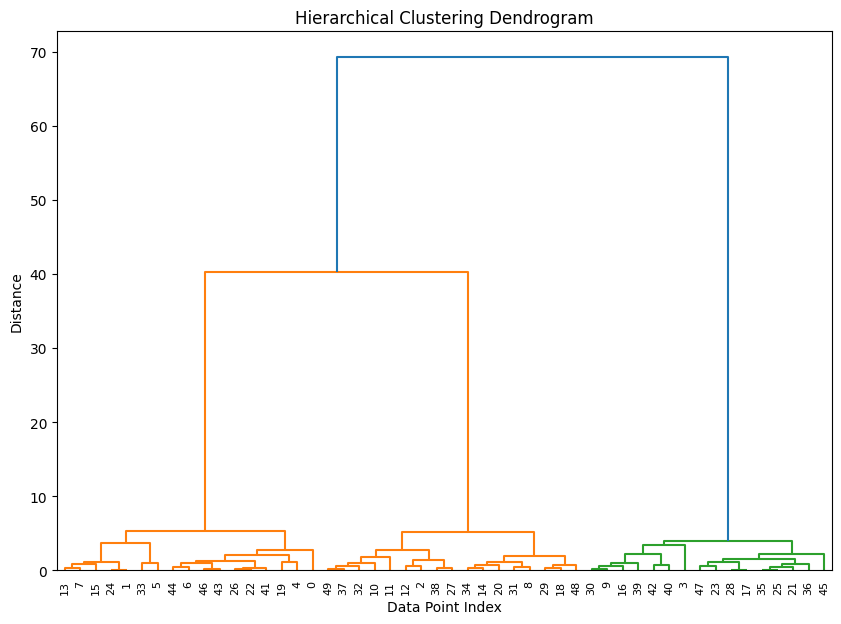

Cluster Membership for 3 clusters:
Data point 0: Cluster 3
Data point 1: Cluster 3
Data point 2: Cluster 2
Data point 3: Cluster 1
Data point 4: Cluster 3
Data point 5: Cluster 3
Data point 6: Cluster 3
Data point 7: Cluster 3
Data point 8: Cluster 2
Data point 9: Cluster 1
Data point 10: Cluster 2
Data point 11: Cluster 2
Data point 12: Cluster 2
Data point 13: Cluster 3
Data point 14: Cluster 2
Data point 15: Cluster 3
Data point 16: Cluster 1
Data point 17: Cluster 1
Data point 18: Cluster 2
Data point 19: Cluster 3
Data point 20: Cluster 2
Data point 21: Cluster 1
Data point 22: Cluster 3
Data point 23: Cluster 1
Data point 24: Cluster 3
Data point 25: Cluster 1
Data point 26: Cluster 3
Data point 27: Cluster 2
Data point 28: Cluster 1
Data point 29: Cluster 2
Data point 30: Cluster 1
Data point 31: Cluster 2
Data point 32: Cluster 2
Data point 33: Cluster 3
Data point 34: Cluster 2
Data point 35: Cluster 1
Data point 36: Cluster 1
Data point 37: Cluster 2
Data point 38: Cluster 2


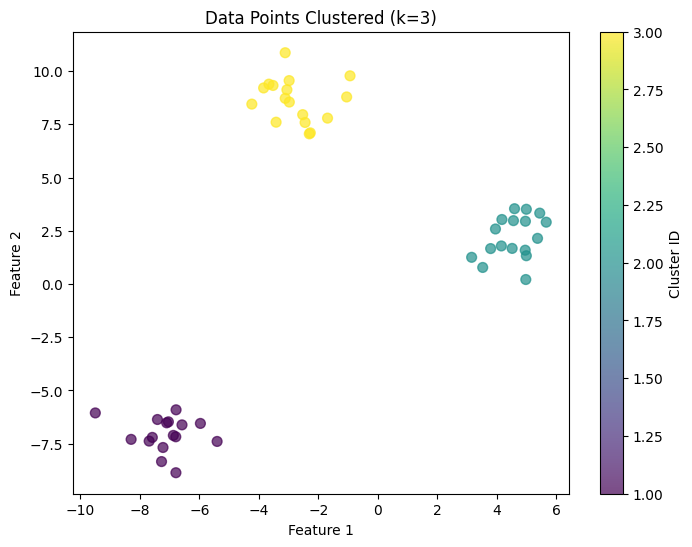

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# 1. Generate Sample Data
X, _ = make_blobs(n_samples=50, centers=3, random_state=42, cluster_std=1.0)

# 2. Perform Hierarchical Clustering (Agglomerative)
# 'ward' linkage minimizes the variance within each cluster
linked = linkage(X, method='ward')

# 3. Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

# 4. Determine Cluster Membership and Profile
# Cut the dendrogram to get a specific number of clusters (e.g., 3 clusters)
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

print(f"Cluster Membership for {num_clusters} clusters:")
for i, cluster_id in enumerate(clusters):
    print(f"Data point {i}: Cluster {cluster_id}")

# Calculate Cluster Profiles (e.g., mean of features for each cluster)
unique_clusters = np.unique(clusters)
print("\nCluster Profiles (Mean of features):")
for cluster_id in unique_clusters:
    cluster_points = X[clusters == cluster_id]
    profile = np.mean(cluster_points, axis=0)
    print(f"Cluster {cluster_id}: {profile}")

# 5. Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title(f'Data Points Clustered (k={num_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.show()

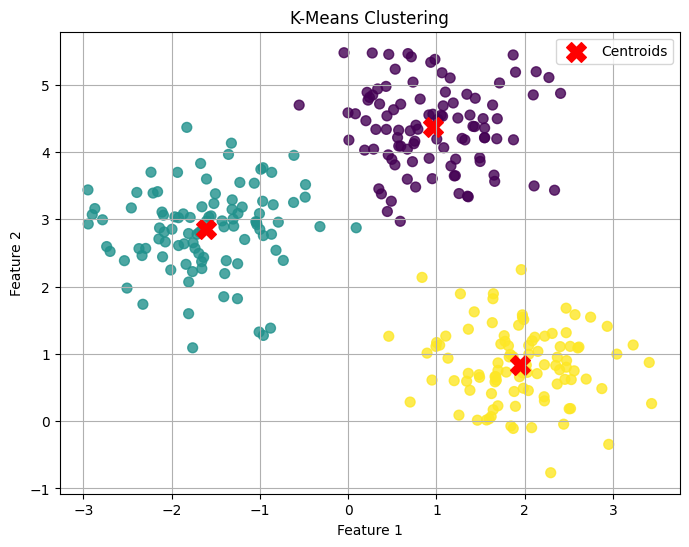

Cluster centroids:
[[ 0.95625704  4.37226546]
 [-1.60811992  2.85881658]
 [ 1.95159369  0.83467497]]
First 10 cluster assignments:
[0 2 0 1 1 1 2 0 1 1]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Generate Sample Data
# Create a synthetic dataset with 3 distinct "blobs" for demonstration
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 2. Apply K-Means Clustering
# Initialize KMeans with 3 clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init for robust centroid initialization

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the final centroids
centroids = kmeans.cluster_centers_

# 3. Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print(f"Cluster centroids:\n{centroids}")
print(f"First 10 cluster assignments:\n{labels[:10]}")

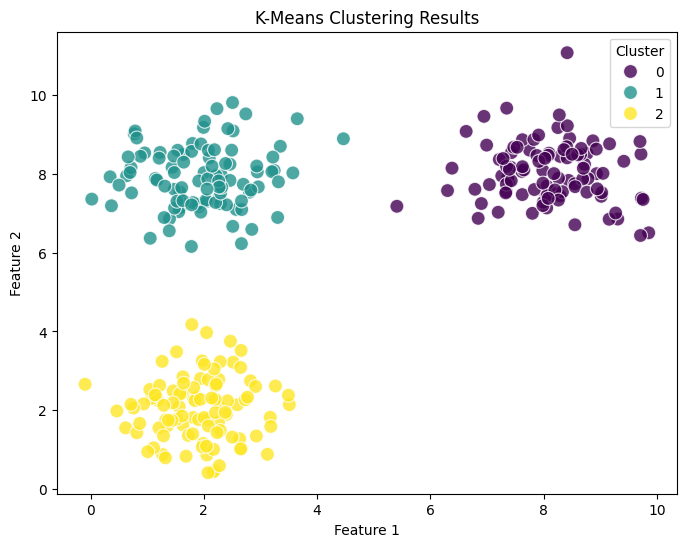


Cluster Profiles (Mean of Features):
         Feature1  Feature2
Cluster                    
0        8.102599  8.034790
1        1.963970  7.898982
2        1.907549  2.027218


In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
data = np.concatenate([
np.random.normal(loc=[2, 2], scale=0.8, size=(100, 2)),
np.random.normal(loc=[8, 8], scale=0.8, size=(100, 2)),
np.random.normal(loc=[2, 8], scale=0.8, size=(100, 2))
])
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# Choose K (e.g., 3 clusters based on data generation)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init for multiple initializations
df['Cluster'] = kmeans.fit_predict(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
cluster_profiles = df.groupby('Cluster').mean()
print("\nCluster Profiles (Mean of Features):")
print(cluster_profiles)

In [9]:
df.head()

,Feature1,Feature2,Cluster
0,2.397371,1.889389,2
1,2.518151,3.218424,2
2,1.812677,1.812690,2
3,3.263370,2.613948,2
4,1.624420,2.434048,2


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42715 sha256=6af0e607b9840f87fd2b61cd404991f82bb5159fb3d1b1df4749a7d89212b959
  Stored in directory: c:\users\rashmi\appdata\local\pip\cache\wheels\87\6e\8f\914f20e0242ee0214e5c8336031a2fab12e632e4695fbb7276
Successfully built factor_analyzer
KMO Measure: 0.24
Bartlett's Test p-value: 0.0000

Explained Variance Ratio:
[0.4655368  0.28647177]

Factor Loadings:
            Factor1   Factor2
Variable1  0.286885  0.973296
Variable2  0.974966  0.201992
Variable3  0.997962  0.016625
Variable4  0.063539  0.298735
Variable5 -0.077119  0.536670



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Rashmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


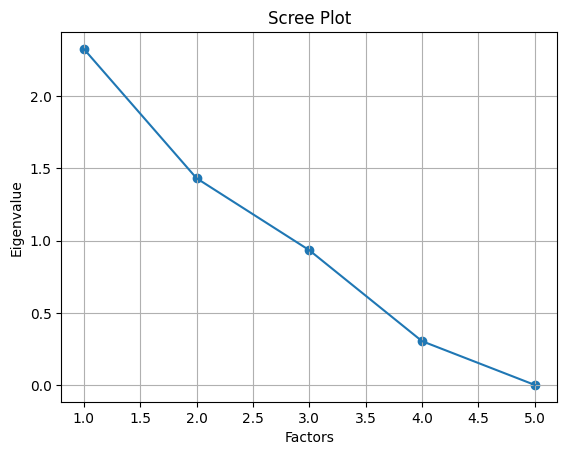

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt

# Sample Data (replace with your actual data)
data = {
    'Variable1': [10, 12, 15, 11, 13, 14, 16, 10, 12, 15],
    'Variable2': [8, 9, 11, 7, 20, 22, 13, 8, 9, 11],
    'Variable3': [5, 6, 7, 5, 26, 28, 9, 5, 6, 7],
    'Variable4': [18, 20, 22, 29, 21, 23, 25, 18, 20, 22],
    'Variable5': [22, 23, 24, 22, 23, 25, 26, 20, 30, 40]
}
df = pd.DataFrame(data)

# 1. Check Adequacy (KMO and Bartlett's Test)
kmo_all, kmo_model = calculate_kmo(df)
chi_square_value, p_value = calculate_bartlett_sphericity(df)

print(f"KMO Measure: {kmo_model:.2f}")
print(f"Bartlett's Test p-value: {p_value:.4f}")

# 2. Data Standardization (Important for PCA/Factor Analysis)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. PCA Implementation
pca = PCA(n_components=2) # Extracting 2 principal components
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# 4. Factor Analysis and Loadings
# Assuming 2 factors based on PCA or domain knowledge
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(scaled_data)

# Factor Loadings
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=['Factor1', 'Factor2'])
print("\nFactor Loadings:")
print(loadings)

# Scree Plot (to help determine number of factors)
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, scaled_data.shape[1] + 1), ev)
plt.plot(range(1, scaled_data.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()